<a href="https://colab.research.google.com/github/stefvas/neural-networks/blob/main/ergasia1_UCI_part1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Μέρος 1. UCI dataset

Το dataset περιλαμβάνει data που συγκέντρωσε το MAGIC Telescope. Συγκεκριμένα, το τηλεσκόπιο τράβηξε δεκάδες χιλιάδες φωτογραφίες από electromagnetic showers στην ατμόσφαιρα. Αναλύοντας τις 10 παραμέτρους των shower images που προκύπτουν από το τηλεσκόπιο, κατηγοριοποιούμε τα showers σε εκείνα που προκλήθηκαν από gamma rays (g) και σε hadronic showers (h), δηλαδή σε εκείνα που προκλήθηκαν από τις κοσμικές ακτίνες της ατμόσφαιρας.
 Αναλυτικότερα στην [περιγραφή](http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) από το UCI

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn import preprocessing
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

 Συνάρτηση που χρησιμοποιεί την cross_val_score function του scikit-learn για να κάνει cross-validation (εδώ 10-fold):

In [ ]:
def evaluate_classifier(clf, X, y, folds=10):
	scores = cross_val_score(clf, X, y, cv=folds)
	return np.mean(scores)

**Εισαγωγή και επισκόπηση:**

In [ ]:
#Dataloading
df = pd.read_csv("magic04.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Δεν κάναμε κάποια μετατροπή στο dataset πρωτού το ανεβάσαμε. Επίσης διαβάσαμε στην περιγραφή ότι δεν περιλαμβάνει κενές τιμές.

Eπαλήθευση:

In [ ]:
df.isnull().values.any()

False

Παρατηρούμε ότι δεν περιλαμβάνει επικεφαλίδες εκτυπώνοντας την 1η σειρά:

In [ ]:
print(df.values[0])

[28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092
 81.8828 'g']


χωρίζουμε τα data : features (x) , labels (y)

In [ ]:
featueres_df=df.loc[:,0:9]
labels_df=df.loc[:,10:10]
print(featueres_df.shape)
print(labels_df.shape)

(19020, 10)
(19020, 1)


παρουσιάζονται καλύτερα ως numpy arrays:


*  features: nympy array of 19020 rows and 10 columns
*  19020 δείγματα με 10 χαρακτηριστικά το κάθε ένα

In [ ]:
features=featueres_df.values
print(features)
print(features.shape)

[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.9018   3.9939 ... -63.8389  84.6874 408.3166]
 [187.1814  53.0014   3.2093 ...  31.4755  52.731  272.3174]]
(19020, 10)


Labels: numpy array of 19020 rows and 1 column


In [ ]:
labels=labels_df.values.reshape(19020,)
print(labels)
print(labels.shape)

['g' 'g' 'g' ... 'h' 'h' 'h']
(19020,)


Ο τύπος των δεδομένων στα features είναι float:

In [ ]:
print(type(features[0,0]))

<class 'numpy.float64'>


Ο τύπος των δεδομένων στα labels είναι string:

In [ ]:
print(type(labels[0]))

<class 'str'>


Επομένως:
* Oι κλάσεις βρίσκονται στην τελευταία στήλη και διακρίνονται σε "gamma" : "g" και "hadron" : "h".
* Δεν έχουμε επικεφαλίδες ούτε αρίθμηση γραμμών
* Δεν απουσιάζει κανένα δείγμα






Έλεγχος αν το dataset είναι balanced:

In [ ]:
print("number of classes: 2")
print("number of samples of both classes: ",len(labels))
g=np.sum(df.values[:, -1] == 'g')
h=np.sum(df.values[:, -1] == 'h')
print("number of g: ",g,", number of h: ",h)
perc=min(g,h)/len(labels)
if perc<0.4:
  print("Not balanced. Min class percentage = ",perc," (should be atleast 40%)")
else:
  print("Balanced. Min class percentage = ",perc)


number of classes: 2
number of samples of both classes:  19020
number of g:  12332 , number of h:  6688
Not balanced. Min class percentage =  0.3516298633017876  (should be atleast 40%)


Διαχωρίζουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(features,labels,test_size=0.3)

In [ ]:
label_names=['gamma','hadron']

# Dummy Classifier:

In [ ]:
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_g = DummyClassifier(strategy="constant", constant='g')
dc_constant_h = DummyClassifier(strategy="constant", constant='h')
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [ ]:
magic_accuracy = {}
dc_uniform.fit(x_train, y_train)
magic_accuracy['uniform (random)'] = dc_uniform.score(x_train, y_train)
model = dc_constant_g.fit(x_train, y_train)
magic_accuracy['constant g'] = dc_constant_g.score(x_train, y_train)
model = dc_constant_h.fit(x_train, y_train)
magic_accuracy['constant h'] = dc_constant_h.score(x_train, y_train)
model = dc_most_frequent.fit(x_train, y_train)
magic_accuracy['most frequent label'] = dc_most_frequent.score(x_train, y_train)
model = dc_stratified.fit(x_train, y_train)
magic_accuracy['stratified'] = dc_stratified.score(x_train, y_train)


In [ ]:
print("Classification Accuracy on the magic Dataset (30% test set)\n")
sorted_accuracy = [(k, magic_accuracy[k]) for k in sorted(magic_accuracy, key=magic_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the magic Dataset (30% test set)

constant g 0.6450353011867207
most frequent label 0.6450353011867207
stratified 0.5432627309598919
uniform (random) 0.5021030494216614
constant h 0.35496469881327924


In [ ]:
x=features
y=labels

Dummy Classifier Baseline:
Classification Test Accuracy: 54.732%
Classification Validation Accuracy: 54.564%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


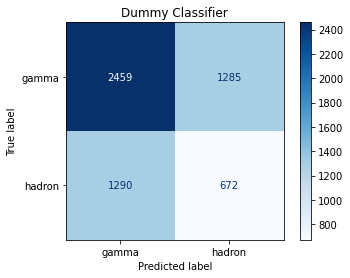

              precision    recall  f1-score   support

       gamma       0.65      0.64      0.65      3744
      hadron       0.34      0.35      0.34      1962

    accuracy                           0.54      5706
   macro avg       0.49      0.49      0.49      5706
weighted avg       0.54      0.54      0.54      5706

F1_Micro Score: 53.978%
F1_Macro Score: 49.437%

KNN Classifier Baseline:
Classification Test Accuracy: 80.599%
Classification Validation Accuracy: 80.836%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


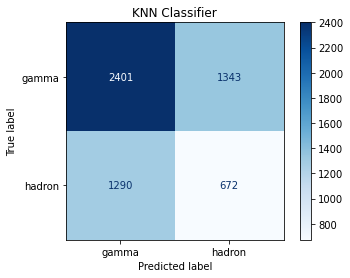

              precision    recall  f1-score   support

       gamma       0.81      0.92      0.86      3744
      hadron       0.80      0.59      0.67      1962

    accuracy                           0.81      5706
   macro avg       0.80      0.75      0.77      5706
weighted avg       0.80      0.81      0.80      5706

F1_Micro Score: 80.599%
F1_Macro Score: 76.824%

Naive Bayes Classifier Baseline:
Classification Test Accuracy: 72.853%
Classification Validation Accuracy: 72.687%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


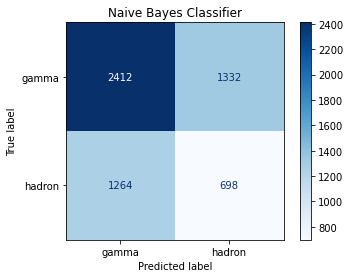

              precision    recall  f1-score   support

       gamma       0.73      0.92      0.82      3744
      hadron       0.70      0.36      0.48      1962

    accuracy                           0.73      5706
   macro avg       0.72      0.64      0.65      5706
weighted avg       0.72      0.73      0.70      5706

F1_Micro Score: 72.853%
F1_Macro Score: 64.756%

SVM Classifier Baseline:
Classification Test Accuracy: 82.492%
Classification Validation Accuracy: 82.450%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


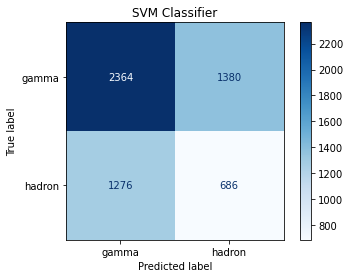

              precision    recall  f1-score   support

       gamma       0.81      0.95      0.88      3744
      hadron       0.86      0.59      0.70      1962

    accuracy                           0.82      5706
   macro avg       0.84      0.77      0.79      5706
weighted avg       0.83      0.82      0.82      5706

F1_Micro Score: 82.492%
F1_Macro Score: 78.702%

MLP Classifier Baseline:
Classification Test Accuracy: 83.579%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Classification Validation Accuracy: 83.980%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


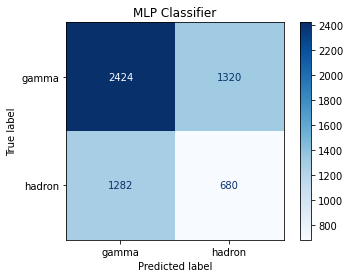

              precision    recall  f1-score   support

       gamma       0.83      0.95      0.88      3744
      hadron       0.86      0.63      0.72      1962

    accuracy                           0.84      5706
   macro avg       0.84      0.79      0.80      5706
weighted avg       0.84      0.84      0.83      5706

F1_Micro Score: 83.579%
F1_Macro Score: 80.363%



In [ ]:
#Dummy classification

#Dummy CLassifier
print("Dummy Classifier Baseline:")
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='stratified')
dc.fit(x_train, y_train)
score = dc.score(x_test, y_test)
print('Classification Test Accuracy: {:.3f}%'.format(100 * score))
score = evaluate_classifier(dc, x, y, folds=10)
print('Classification Validation Accuracy: {:.3f}%'.format(100 * score))
pred = dc.predict(x_test)
disp = plot_confusion_matrix(dc, x_test, y_test,
                              display_labels=label_names,
                              cmap=plt.cm.Blues,
                              normalize=None, values_format='d')
disp.ax_.set_title('Dummy Classifier')
plt.show()
print(classification_report(y_test, pred, target_names=label_names))
dc_f1_m = f1_score(y_test,pred,average='micro')
dc_f1_M = f1_score(y_test,pred,average='macro')
print('F1_Micro Score: {:.3f}%'.format(100 * dc_f1_m))
print('F1_Macro Score: {:.3f}%'.format(100 * dc_f1_M))
print("")

#KNN CLassifier
print("KNN Classifier Baseline:")
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
score = knn.score(x_test, y_test)
print('Classification Test Accuracy: {:.3f}%'.format(100 * score))
score = evaluate_classifier(knn, x, y, folds=10)
print('Classification Validation Accuracy: {:.3f}%'.format(100 * score))
pred = knn.predict(x_test)
disp = plot_confusion_matrix(dc, x_test, y_test,
                              display_labels=label_names,
                              cmap=plt.cm.Blues,
                              normalize=None, values_format='d')
disp.ax_.set_title('KNN Classifier')
plt.show()
print(classification_report(y_test, pred, target_names=label_names))
knn_f1_m = f1_score(y_test,pred,average='micro')
knn_f1_M = f1_score(y_test,pred,average='macro')
print('F1_Micro Score: {:.3f}%'.format(100 * knn_f1_m))
print('F1_Macro Score: {:.3f}%'.format(100 * knn_f1_M))
print("")

#Naive Bayes CLassifier
print("Naive Bayes Classifier Baseline:")
gauss = GaussianNB()
gauss.fit(x_train, y_train)
score = gauss.score(x_test, y_test)
print('Classification Test Accuracy: {:.3f}%'.format(100 * score))
score = evaluate_classifier(gauss, x, y, folds=10)
print('Classification Validation Accuracy: {:.3f}%'.format(100 * score))
pred = gauss.predict(x_test)
disp = plot_confusion_matrix(dc, x_test, y_test,
                              display_labels=label_names,
                              cmap=plt.cm.Blues,
                              normalize=None, values_format='d')
disp.ax_.set_title('Naive Bayes Classifier')
plt.show()
print(classification_report(y_test, pred, target_names=label_names))
gauss_f1_m = f1_score(y_test,pred,average='micro')
gauss_f1_M = f1_score(y_test,pred,average='macro')
print('F1_Micro Score: {:.3f}%'.format(100 * gauss_f1_m))
print('F1_Macro Score: {:.3f}%'.format(100 * gauss_f1_M))
print("")

#SVM CLassifier
print("SVM Classifier Baseline:")
sv = svm.SVC()
sv.fit(x_train, y_train)
score = sv.score(x_test, y_test)
print('Classification Test Accuracy: {:.3f}%'.format(100 * score))
score = evaluate_classifier(sv, x, y, folds=10)
print('Classification Validation Accuracy: {:.3f}%'.format(100 * score))
pred = sv.predict(x_test)
disp = plot_confusion_matrix(dc, x_test, y_test,
                              display_labels=label_names,
                              cmap=plt.cm.Blues,
                              normalize=None, values_format='d')
disp.ax_.set_title('SVM Classifier')
plt.show()
print(classification_report(y_test, pred, target_names=label_names))
svm_f1_m = f1_score(y_test,pred,average='micro')
svm_f1_M = f1_score(y_test,pred,average='macro')
print('F1_Micro Score: {:.3f}%'.format(100 * svm_f1_m))
print('F1_Macro Score: {:.3f}%'.format(100 * svm_f1_M))
print("")

#MLP CLassifier
print("MLP Classifier Baseline:")
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
score = mlp.score(x_test, y_test)
print('Classification Test Accuracy: {:.3f}%'.format(100 * score))
score = evaluate_classifier(mlp, x, y, folds=10)
print('Classification Validation Accuracy: {:.3f}%'.format(100 * score))
pred = mlp.predict(x_test)
disp = plot_confusion_matrix(dc, x_test, y_test,
                              display_labels=label_names,
                              cmap=plt.cm.Blues,
                              normalize=None, values_format='d')
disp.ax_.set_title('MLP Classifier')
plt.show()
print(classification_report(y_test, pred, target_names=label_names))
mlp_f1_m = f1_score(y_test,pred,average='micro')
mlp_f1_M = f1_score(y_test,pred,average='macro')
print('F1_Micro Score: {:.3f}%'.format(100 * mlp_f1_m))
print('F1_Macro Score: {:.3f}%'.format(100 * mlp_f1_M))
print("")

Γενικά λόγω του μη ισσοροπημένου dataset παρατηρούμε μεγάλη διαφορά στα στατιστικά των δύο κλάσεων. Ιδιαίτερα στο recall η κλάση 'h'/background, έχει αρκέτα χειρότερα αποτελέσματα σε όλους τους classifiers. Προφανώς αυτό αποτυπώνεται κυρίως στα f1 score που παίρνουν harmonic average για recall/precision, αλλά και στο accuracy. Για KNN, SVM, MLP βλέπουμε αρκετά καλά αποτελέσματα, ιδίως για τα 2 τελευταία.

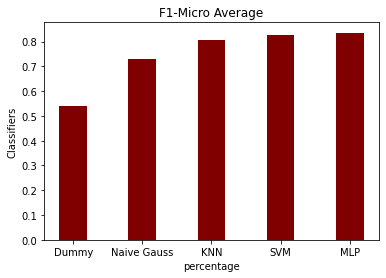

[0.53978268 0.72853137 0.80599369 0.82492114 0.83578689]


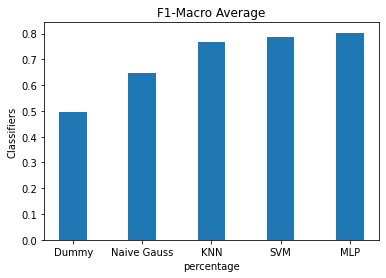

[0.4943718  0.64755883 0.76823965 0.78702263 0.80363129]


In [ ]:
labels = ['Dummy','Naive Gauss','KNN','SVM','MLP']
values = np.array([dc_f1_m,gauss_f1_m,knn_f1_m,svm_f1_m,mlp_f1_m])

  
# creating the bar plot 
plt.bar(labels, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("percentage") 
plt.ylabel("Classifiers") 
plt.title("F1-Micro Average") 
plt.show() 
print(values)



values = np.array([dc_f1_M,gauss_f1_M,knn_f1_M,svm_f1_M,mlp_f1_M])

  
# creating the bar plot 
plt.bar(labels, values,  
        width = 0.4) 
  
plt.xlabel("percentage") 
plt.ylabel("Classifiers") 
plt.title("F1-Macro Average") 
plt.show()
print(values)



# Βελτιστοποίηση

Αρχικά βλέπουμε ότι κανένα χαρακτηριστικό δεν έχει μηδενική διασπορά. Ωστόσο 2-3 χαρακτηριστικά έχουν σχετικά μικρή διασπορά, αλλα λόγω του ότι ούτως ή άλλως είναι μόνο 10 δεν έχει πάρα πολύ νόημα να τα απαλείψουμε, δεδομένου πως έχουμε 19020 δείγματα. Για τον ίδιο λόγο επίσης δεν έχει νόημα να κάνουμε PCA. Με grid search επιβεαιώνουμε πραγματί μικρή μείωση της απόδοσης αν απαλήψουμε χαρακτηριστικά με grid search στα [0.5 0.1 0.03]

Θα εφαρμόσουμε κανονική κανονικοποίηση στα δεδομένα με τον StandardScaler.

Τέλος θα ισσοροπήσουμε καλύτερα το dataset κάνοντας oversampling. Δοκιμάζοντας δίαφορους συνδυασμούς oversampling καταλήγουμε πως για αναλογία 0.7:1 στις 2 κλάσεις έχουμε το καλύτερο αποτέλεσμα

Dummy optimization - f1_micro
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py"


Optimal parameters tuned on dev set: {'gnb__strategy': 'most_frequent', 'sampler__sampling_strategy': 0.8}

Χρόνος fit=9.024047613143921, Χρόνος predict=0.0018041133880615234, Συνολικός χρόνος=9.025851726531982  seconds



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


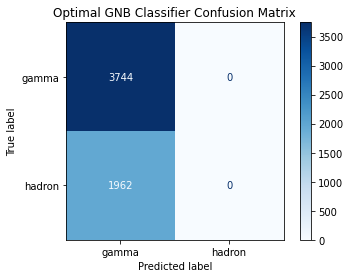

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       gamma       0.66      1.00      0.79      3744
      hadron       0.00      0.00      0.00      1962

    accuracy                           0.66      5706
   macro avg       0.33      0.50      0.40      5706
weighted avg       0.43      0.66      0.52      5706

F1_Micro Score: 65.615%
F1_Macro Score: 39.619%

Dummy optimization - f1_macro
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py"


Optimal parameters tuned on dev set: {'gnb__strategy': 'most_frequent', 'sampler__sampling_strategy': 0.8}

Χρόνος fit=6.424012660980225, Χρόνος predict=0.0009577274322509766, Συνολικός χρόνος=6.424970388412476  seconds



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


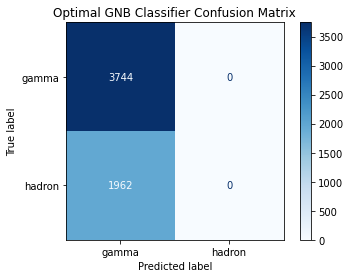

              precision    recall  f1-score   support

       gamma       0.66      1.00      0.79      3744
      hadron       0.00      0.00      0.00      1962

    accuracy                           0.66      5706
   macro avg       0.33      0.50      0.40      5706
weighted avg       0.43      0.66      0.52      5706

F1_Micro Score: 65.615%
F1_Macro Score: 39.619%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Dummy optimization
dc_f1 = []
train_time_dc = 0
predict_time_dc = 0

scorer=['f1_micro','f1_macro']
for s in scorer:
  print('Dummy optimization - %s' % s)

  #Pipeline
  #αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
  scaler = StandardScaler()
  ros = RandomOverSampler()
  clf = DummyClassifier() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
  pipe = Pipeline(steps=[('scaler', scaler),('sampler', ros), ('gnb', clf)], memory = 'tmp')

  #Grid Search - KNN
  r=[0.55,0.8,1.0]

  strategy=['statified','most_frequent','prior''uniform','constant']
  estimator = GridSearchCV(pipe, dict(sampler__sampling_strategy=r,gnb__strategy=strategy), scoring=s, cv=5, n_jobs=-1, verbose=10)

  import time
  start_time = time.time()
  estimator.fit(x_train, y_train)
  train_time = time.time()
  pred = estimator.predict(x_test)

  print('')
  print('Optimal parameters tuned on dev set:',estimator.best_params_)
  print('')

  train_time_dc = train_time - start_time
  predict_time_dc = time.time() - train_time
  print("Χρόνος fit=%s, Χρόνος predict=%s, Συνολικός χρόνος=%s  seconds" % (train_time_dc,predict_time_dc,train_time_dc+predict_time_dc))
  print('')

  disp = plot_confusion_matrix(estimator, x_test, y_test,
                                display_labels=label_names,
                                cmap=plt.cm.Blues,
                                normalize=None, values_format='d')
  disp.ax_.set_title('Optimal GNB Classifier Confusion Matrix')
  plt.show()

  print(classification_report(y_test, pred, target_names=label_names))
  Odc_f1_m = f1_score(y_test,pred,average='micro')
  Odc_f1_M = f1_score(y_test,pred,average='macro')
  dc_f1.append(Odc_f1_m)
  dc_f1.append(Odc_f1_M)
  print('F1_Micro Score: {:.3f}%'.format(100 * Odc_f1_m))
  print('F1_Macro Score: {:.3f}%'.format(100 * Odc_f1_M))
  print("")

GNB optimization - f1_micro
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", 


Optimal parameters tuned on dev set: {'sampler__sampling_strategy': 0.85}

Χρόνος fit=2.7586288452148438, Χρόνος predict=0.0031900405883789062, Συνολικός χρόνος=2.7618188858032227  seconds



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


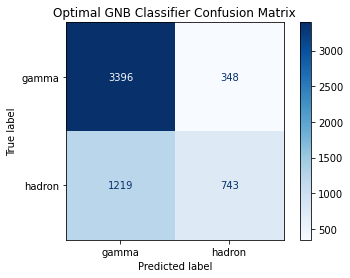

              precision    recall  f1-score   support

       gamma       0.74      0.91      0.81      3744
      hadron       0.68      0.38      0.49      1962

    accuracy                           0.73      5706
   macro avg       0.71      0.64      0.65      5706
weighted avg       0.72      0.73      0.70      5706

F1_Micro Score: 72.538%
F1_Macro Score: 64.964%

GNB optimization - f1_macro
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", 


Optimal parameters tuned on dev set: {'sampler__sampling_strategy': 1.0}

Χρόνος fit=1.5387754440307617, Χρόνος predict=0.001958131790161133, Συνολικός χρόνος=1.5407335758209229  seconds



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


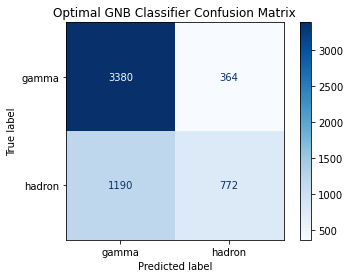

              precision    recall  f1-score   support

       gamma       0.74      0.90      0.81      3744
      hadron       0.68      0.39      0.50      1962

    accuracy                           0.73      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.72      0.73      0.70      5706

F1_Micro Score: 72.766%
F1_Macro Score: 65.574%



In [ ]:
#GNB optimization
gnb_f1 = []
train_time_gnb = 0
predict_time_gnb = 0

scorer=['f1_micro','f1_macro']
for s in scorer:
  print('GNB optimization - %s' % s)

  #Pipeline
  #αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
  ros = RandomOverSampler()
  clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
  pipe = Pipeline(steps=[('sampler', ros), ('gnb', clf)], memory = 'tmp')

  #Grid Search - KNN
  r=[0.55,0.85,1.0]



  estimator = GridSearchCV(pipe, dict(sampler__sampling_strategy=r), scoring=s, cv=5, n_jobs=-1, verbose=10)

  import time
  start_time = time.time()
  estimator.fit(x_train, y_train)
  train_time = time.time()
  pred = estimator.predict(x_test)

  print('')
  print('Optimal parameters tuned on dev set:',estimator.best_params_)
  print('')

  train_time_gnb = train_time - start_time
  predict_time_gnb = time.time() - train_time
  print("Χρόνος fit=%s, Χρόνος predict=%s, Συνολικός χρόνος=%s  seconds" % (train_time_gnb,predict_time_gnb,train_time_gnb+predict_time_gnb))
  print('')

  disp = plot_confusion_matrix(estimator, x_test, y_test,
                                display_labels=label_names,
                                cmap=plt.cm.Blues,
                                normalize=None, values_format='d')
  disp.ax_.set_title('Optimal GNB Classifier Confusion Matrix')
  plt.show()

  print(classification_report(y_test, pred, target_names=label_names))
  Oknn_f1_m = f1_score(y_test,pred,average='micro')
  Oknn_f1_M = f1_score(y_test,pred,average='macro')
  gnb_f1.append(Oknn_f1_m)
  gnb_f1.append(Oknn_f1_M)
  print('F1_Micro Score: {:.3f}%'.format(100 * Oknn_f1_m))
  print('F1_Macro Score: {:.3f}%'.format(100 * Oknn_f1_M))
  print("")

KNN optimization - f1_micro
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.


Optimal parameters tuned on dev set: {'kNN__metric': 'euclidean', 'kNN__n_neighbors': 41, 'kNN__weights': 'distance', 'sampler__sampling_strategy': 0.8}

Χρόνος fit=67.26113510131836, Χρόνος predict=0.6227359771728516, Συνολικός χρόνος=67.88387107849121  seconds



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


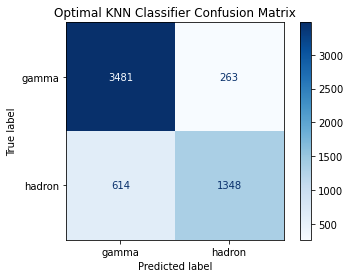

              precision    recall  f1-score   support

       gamma       0.85      0.93      0.89      3744
      hadron       0.84      0.69      0.75      1962

    accuracy                           0.85      5706
   macro avg       0.84      0.81      0.82      5706
weighted avg       0.85      0.85      0.84      5706

F1_Micro Score: 84.630%
F1_Macro Score: 82.134%

KNN optimization - f1_macro
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.


Optimal parameters tuned on dev set: {'kNN__metric': 'euclidean', 'kNN__n_neighbors': 21, 'kNN__weights': 'distance', 'sampler__sampling_strategy': 0.8}

Χρόνος fit=66.86106181144714, Χρόνος predict=0.5134515762329102, Συνολικός χρόνος=67.37451338768005  seconds



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


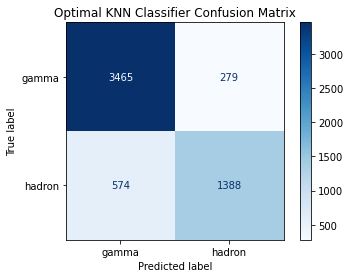

              precision    recall  f1-score   support

       gamma       0.86      0.93      0.89      3744
      hadron       0.83      0.71      0.76      1962

    accuracy                           0.85      5706
   macro avg       0.85      0.82      0.83      5706
weighted avg       0.85      0.85      0.85      5706

F1_Micro Score: 85.051%
F1_Macro Score: 82.768%



In [ ]:
#KNN optimization
knn_f1 = []
train_time_knn = 0
predict_time_knn = 0

scorer=['f1_micro','f1_macro']
for s in scorer:
  print('KNN optimization - %s' % s)

  #Pipeline
  # αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
  scaler = StandardScaler()
  ros = RandomOverSampler()
  clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
  pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('kNN', clf)], memory = 'tmp')

  #Grid Search - KNN
  r=[0.55,0.8]

  # k = [1, 6, 11, 21, 31, 41] # η υπερπαράμετρος του ταξινομητή
  k = [1, 6, 11, 21, 31, 41] # η υπερπαράμετρος του ταξινομητή


  w=['uniform', 'distance']
  metrics=['euclidean','minkowski','mahalanobis']

  estimator = GridSearchCV(pipe, dict(sampler__sampling_strategy=r,kNN__metric=metrics,kNN__weights=w,kNN__n_neighbors=k), scoring=s, cv=5, n_jobs=-1, verbose=10)

  import time
  start_time = time.time()
  estimator.fit(x_train, y_train)
  train_time = time.time()
  pred = estimator.predict(x_test)

  print('')
  print('Optimal parameters tuned on dev set:',estimator.best_params_)
  print('')

  train_time_knn = train_time - start_time
  predict_time_knn = time.time() - train_time
  print("Χρόνος fit=%s, Χρόνος predict=%s, Συνολικός χρόνος=%s  seconds" % (train_time_knn,predict_time_knn,train_time_knn+predict_time_knn))
  print('')

  disp = plot_confusion_matrix(estimator, x_test, y_test,
                                display_labels=label_names,
                                cmap=plt.cm.Blues,
                                normalize=None, values_format='d')
  disp.ax_.set_title('Optimal KNN Classifier Confusion Matrix')
  plt.show()

  print(classification_report(y_test, pred, target_names=label_names))
  Oknn_f1_m = f1_score(y_test,pred,average='micro')
  Oknn_f1_M = f1_score(y_test,pred,average='macro')
  knn_f1.append(Oknn_f1_m)
  knn_f1.append(Oknn_f1_M)
  print('F1_Micro Score: {:.3f}%'.format(100 * Oknn_f1_m))
  print('F1_Macro Score: {:.3f}%'.format(100 * Oknn_f1_M))
  print("")

Παρατηρούμε όχι μονο την αύξηση όλων των μετρικών κατά 5%, αλλά και την δραματική αύξηση του recall score στην κλάση 'h'/background. Αυο οφείλεται σε πολλούς λόγους.

Αρχικά το dataset είναι πιο ισσοροπημένο οπότε έχουμε μία πιο δίκαιη κατανομή στις κλάσεις των γείτόνων, άρα και πιο ακριβείς προβλέψεις. 

Δεύτερον με την κανονικοποίηση, ιδαίτερα ο αλγόριθμος KNN βελτιώνεται πολύ καθώς διαφορές αποστάσεων με μεγαλύτερα νούμερα παρόλο που είναι ίδιες αναλογικά με μικρότερα νούμερα έχουν περισσότερο βάρος στην πρόβλεψη χωρίς λόγο και αυτό λύνεται με την κανονικοποίηση.

Τέλος προφανώς η gridsearch με την βελτίωση των ιδανικών παραμέτρων αύξησε ακόμα περισσότερο την απόδωση του ταξινομητή.

MLP optimization - f1_micro
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memo


Optimal parameters tuned on dev set: {'mlp__activation': 'relu', 'mlp__alpha': 5e-05, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 150, 'mlp__solver': 'adam', 'sampler__sampling_strategy': 0.8}

Χρόνος fit=5095.205340147018, Χρόνος predict=0.011315584182739258, Συνολικός χρόνος=5095.216655731201  seconds



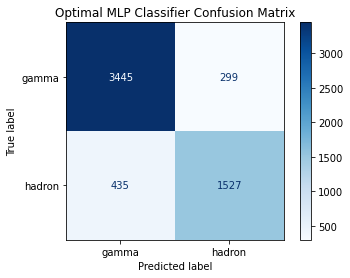

              precision    recall  f1-score   support

       gamma       0.89      0.92      0.90      3744
      hadron       0.84      0.78      0.81      1962

    accuracy                           0.87      5706
   macro avg       0.86      0.85      0.85      5706
weighted avg       0.87      0.87      0.87      5706

F1_Micro Score: 87.136%
F1_Macro Score: 85.498%

MLP optimization - f1_macro
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [ ]:
#MLP optimization
train_time_mlp = 0
predict_time_mlp = 0
mlp_f1 = []
scorer=['f1_micro','f1_macro']
for s in scorer:
  print('MLP optimization - %s' % s)
  #Pipeline
  # αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
  scaler = StandardScaler()
  ros = RandomOverSampler()
  clf = MLPClassifier() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
  pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('mlp', clf)], memory = 'tmp')

  #Grid Search - KNN
  r=[0.55,0.8]

  hidden=[(50,),(100,),(150,)]
  activation=['relu','tanh']
  solver=['adam','sgd']
  iter=[50,100,150]
  learn_rate=['constant','invscaling']
  alpha=[0.00005,0.0001,0.0005]


  # estimator = GridSearchCV(pipe, dict(kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)
  estimator = GridSearchCV(pipe, dict(sampler__sampling_strategy=r,mlp__hidden_layer_sizes=hidden,mlp__activation=activation,mlp__solver=solver,mlp__max_iter=iter,mlp__alpha=alpha,mlp__learning_rate=learn_rate),scoring=s, cv=5, n_jobs=-1, verbose=10)

  import time
  start_time = time.time()
  estimator.fit(x_train, y_train)
  train_time = time.time()
  pred = estimator.predict(x_test)

  print('')
  print('Optimal parameters tuned on dev set:',estimator.best_params_)
  print('')

  train_time_mlp = train_time - start_time
  predict_time_mlp = time.time() - train_time
  print("Χρόνος fit=%s, Χρόνος predict=%s, Συνολικός χρόνος=%s  seconds" % (train_time_mlp,predict_time_mlp,train_time_mlp+predict_time_mlp))
  print('')

  disp = plot_confusion_matrix(estimator, x_test, y_test,
                                display_labels=label_names,
                                cmap=plt.cm.Blues,
                                normalize=None, values_format='d')
  disp.ax_.set_title('Optimal MLP Classifier Confusion Matrix')
  plt.show()

  print(classification_report(y_test, pred, target_names=label_names))
  Omlp_f1_m = f1_score(y_test,pred,average='micro')
  Omlp_f1_M = f1_score(y_test,pred,average='macro')
  mlp_f1.append(Omlp_f1_m)
  mlp_f1.append(Omlp_f1_M)
  print('F1_Micro Score: {:.3f}%'.format(100 * Omlp_f1_m))
  print('F1_Macro Score: {:.3f}%'.format(100 * Omlp_f1_M))
  print("")

MLP optimization - f1_micro
Fitting 10 folds for each of 432 candidates, totalling 2160 fits

In [ ]:
#SVM (non-linear kernel) optimization 
svm_f1 = []
train_time_svm = 0
predict_time_svm = 0
scorer=['f1_micro','f1_macro']
for s in scorer:
  print('SVM (non-linear kernel) optimization - %s' % s)



  #Pipeline
  # αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
  scaler = StandardScaler()
  ros = RandomOverSampler()
  clf = SVC()
  pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('svm', clf)], memory = 'tmp')

  #Grid Search - SVM
  r=[0.56,0.8]

  c = [0.1,1.0,10.0] # η υπερπαράμετρος του ταξινομητή
  gamma=['scale','auto']
  degree=[3,4,6]
  tol=[0.001,0.1]

  estimator = GridSearchCV(pipe, dict(sampler__sampling_strategy=r,svm__C=c,svm__gamma=gamma,svm__degree=degree,svm__tol=tol), scoring=s, cv=5, n_jobs=-1, verbose=10)


  import time
  start_time = time.time()
  estimator.fit(x_train, y_train)
  train_time = time.time()
  pred = estimator.predict(x_test)

  print('')
  print('Optimal parameters tuned on dev set:',estimator.best_params_)
  print('')

  train_time_svm = train_time - start_time
  predict_time_svm = time.time() - train_time
  print("Χρόνος fit=%s, Χρόνος predict=%s, Συνολικός χρόνος=%s  seconds" % (train_time_svm,predict_time_svm,train_time_svm+predict_time_svm))
  print('')

  disp = plot_confusion_matrix(estimator, x_test, y_test,
                                display_labels=label_names,
                                cmap=plt.cm.Blues,
                                normalize=None, values_format='d')
  disp.ax_.set_title('Optimal non-linear SVM Classifier Confusion Matrix')
  plt.show()

  print(classification_report(y_test, pred, target_names=label_names))
  Osvm_f1_m = f1_score(y_test,pred,average='micro')
  Osvm_f1_M = f1_score(y_test,pred,average='macro')
  svm_f1.append(Osvm_f1_m)
  svm_f1.append(Osvm_f1_M)
  print('F1_Micro Score: {:.3f}%'.format(100 * Osvm_f1_m))
  print('F1_Macro Score: {:.3f}%'.format(100 * Osvm_f1_M))
  print("")

In [ ]:
#SVM (linear kernel) optimization 
lsvm_f1=[]
train_time_lsvm = 0
predict_time_lsvm = 0
scorer=['f1_micro','f1_macro']
for s in scorer:
  print('SVM (non-linear kernel) optimization - %s' % s)



  #Pipeline
  # αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
  scaler = StandardScaler()
  ros = RandomOverSampler()
  clf = LinearSVC()
  pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('svm', clf)], memory = 'tmp')

  #Grid Search - SVM
  r=[0.55,0.75,0.95]

  c = [0.1,1.0,10.0] # η υπερπαράμετρος του ταξινομητή
  loss=['hinge','squared_hinge']
  tol=[0.001,0.1]


  w=['uniform', 'distance']
  metrics=['euclidean','minkowski','mahalanobis']

  estimator = GridSearchCV(pipe, dict(sampler__sampling_strategy=r,svm__C=c,svm__loss=loss,svm__tol=tol), scoring=s, cv=5, n_jobs=-1, verbose=10)


  import time
  start_time = time.time()
  estimator.fit(x_train, y_train)
  train_time = time.time()
  pred = estimator.predict(x_test)

  print('')
  print('Optimal parameters tuned on dev set:',estimator.best_params_)
  print('')

  train_time_lsvm = train_time - start_time
  predict_time_lsvm = time.time() - train_time
  print("Χρόνος fit=%s, Χρόνος predict=%s, Συνολικός χρόνος=%s  seconds" % (train_time_svm,predict_time_svm,train_time_svm+predict_time_svm))
  print('')

  disp = plot_confusion_matrix(estimator, x_test, y_test,
                                display_labels=label_names,
                                cmap=plt.cm.Blues,
                                normalize=None, values_format='d')
  disp.ax_.set_title('Optimal non-linear SVM Classifier Confusion Matrix')
  plt.show()

  print(classification_report(y_test, pred, target_names=label_names))
  OLsvm_f1_m = f1_score(y_test,pred,average='micro')
  OLsvm_f1_M = f1_score(y_test,pred,average='macro')
  lsvm_f1.append(OLsvm_f1_m)
  lsvm_f1.append(OLsvm_f1_M)
  print('F1_Micro Score: {:.3f}%'.format(100 * OLsvm_f1_m))
  print('F1_Macro Score: {:.3f}%'.format(100 * OLsvm_f1_M))
  print("")

Σημείωση: Δεν εφαρμώσαμε μετασχηματιστή κανονικοποίησης στον GNB καθώς εσωτερικά ο εκτιμητής κάνει ούτως η άλλως κανονικοποίηση, επομένως δεν θα κερδίζαμε τίποτα, ίσα ίσα μπορεί να έπεφτε η απόδοση.

In [ ]:
#Time chart
from google.colab import data_table


heading = ['Classifier','Train time','Test time']
dc = ['Dummy',train_time_dc,predict_time_dc]
gnb = ['GNB',train_time_gnb,predict_time_gnb]
knn = ['KNN',train_time_knn,predict_time_knn]
mlp = ['MLP',train_time_mlp,predict_time_mlp]
svm = ['SVM',train_time_svm,predict_time_svm]
lsvm = ['LSVM',train_time_lsvm,predict_time_lsvm]

table = [heading,dc,gnb,knn,mlp,svm,lsvm]
table = np.array(table)

df = pd.DataFrame(table)

data_table.DataTable(df,include_index=False)

In [ ]:
#F1_micro comparison chart

labels = ['Dummy','Naive Gauss','KNN','SVM','MLP']
values = np.array([dc_f1_m,gauss_f1_m,knn_f1_m,svm_f1_m,mlp_f1_m])

print(dc_f1[0])

values_opt = np.array([dc_f1[0],gnb_f1[0],knn_f1[0],svm_f1[0],mlp_f1[0]])
  

f1_macros=[]


x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, values, width, label='f1_micros')
rects2 = ax.bar(x + width/2, values_opt, width, label='f1_micros after optimization')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Micro score before vs after optimization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

inc = [labels[i]+'=='+str("{:.2f}".format(((values_opt[i]-values[i])/values[i])*100))+'%' for i in range(len(values))]
print(inc)

In [ ]:
#F1_macro comparison chart

labels = ['Dummy','Naive Gauss','KNN','SVM','MLP']
values = np.array([dc_f1_M,gauss_f1_M,knn_f1_M,svm_f1_M,mlp_f1_M])
values_opt = np.array([dc_f1[3],gnb_f1[3],knn_f1[3],svm_f1[3],mlp_f1[3]])



x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, values, width, label='f1_macros')
rects2 = ax.bar(x + width/2, values_opt, width, label='f1_macros after optimization')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Macro score before vs after optimization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

inc = [labels[i]+'=='+str("{:.2f}".format(((values_opt[i]-values[i])/values[i])*100))+'%' for i in range(len(values))]
print(inc)

# Συμπερασματα


*Σημείωση: Λόγω λάθος καταγραψαμε τα optimal parameters για τον MLP αλλά όχι τα αποτελέσματα του. Επομένως για την αποφυγή επιπλέον καθυστέρησης. Ξανατρέξαμε gridsearch μόνο με τις optimal παραμέτρους για την εύρεση και των αποτελεσμάτων, εξού και τα λίγα iterations.*

Παρατηρούμε όχι μονο την αύξηση όλων των μετρικών κατά 5%, αλλά και την σημαντική αύξηση του recall score στην κλάση 'h'/background στους περισσότερους εκτιμητές. Αυο οφείλεται σε πολλούς λόγους.

Αρχικά το dataset είναι πιο ισσοροπημένο οπότε έχουμε μία πιο δίκαιη κατανομή στις κλάσεις των γείτόνων, άρα και πιο ακριβείς προβλέψεις, όσον αφορα τον KNN

Δεύτερον με την κανονικοποίηση, ιδαίτερα ο αλγόριθμος KNN βελτιώνεται πολύ καθώς διαφορές αποστάσεων με μεγαλύτερα νούμερα παρόλο που είναι ίδιες αναλογικά με μικρότερα νούμερα έχουν περισσότερο βάρος στην πρόβλεψη χωρίς λόγο και αυτό λύνεται με την κανονικοποίηση.

Τέλος προφανώς η gridsearch με την βελτίωση των ιδανικών παραμέτρων αύξησε ακόμα περισσότερο την απόδωση του ταξινομητή.

Γενικότερα βλέπουμε πως το oversampling βοηθάει σχεδόν κυρίως την μετρική f1_macro.
Αυτό είναι λογικό καθώς το f1_macro είναι πιο ευαίσθητο σε αστάθειες κλάσεων.

Αν μας νοίαζει απόλυτα η ακρίβεια του μοντέλου και όχι ο χρόνος εκπαίδεύσης θα διαλέξουμε σαν ιδανικό ταξινομητή τον MLP  οποίος όμως χρειάζεται αρκετό χρόνο για να εκπαιδευτεί. Φυσικά με προσθήκη περισσότερων θα μποροούσαμε να πετύχουμε ακόμα καλύτερη ακρίβεια, αλλά στα πλαίσια του περιορισμένου χρόνου της συγκεκριμένης άσκησης δεν το προσπαθήσαμε.

Στην αντίθετη περίπτωση που χρειαζόμαστε πιο σύντομο χρόνο εκπαίδευσης με ελάχιστα λιγότερη ακρίβεια διαλέγουμε τους KNN/SVM. Παρόλα αυτά στους συγκεκριμένους αλγόριθμους δύσκολα θα επτύχουμε ακόμα καλύτερη ακρίβεια.

